# To predict diabetes using PIMA diabetes data
Diabetes
Diabetes is a disease that occurs when your blood glucose, also called blood sugar, is too high. Blood glucose is your main source of energy and comes from the food you eat. Insulin, a hormone made by the pancreas, helps glucose from food get into your cells to be used for energy(metabolism). Pima Indians with type 2 diabetes are metabolically characterized by obesity, insulin resistance, insulin secretory dysfunction, and increased rates of endogenous glucose production, which are the clinical characteristics that define this disease across most populations.

Objective Description: Predict the onset of diabetes based on diagnostic measures. This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective is to predict based on diagnostic measurements whether a patient has diabetes.

Fields description follow:

preg = Number of times pregnant

plas = Plasma glucose concentration a 2 hours in an oral glucose tolerance test

pres = Diastolic blood pressure (mm Hg)

skin = Triceps skin fold thickness (mm)

test = 2-Hour serum insulin (mu U/ml)

mass = Body mass index (weight in kg/(height in m)^2)

pedi = Diabetes pedigree function

age = Age (years)

class = Class variable (1:tested positive for diabetes, 0: tested negative for diabetes)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
d=pd.read_csv('pima-data.csv')

In [ ]:
d.head()

In [93]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   num_preg      768 non-null    int64  
 1   glucose_conc  768 non-null    int64  
 2   diastolic_bp  768 non-null    int64  
 3   thickness     768 non-null    int64  
 4   insulin       768 non-null    int64  
 5   bmi           768 non-null    float64
 6   diab_pred     768 non-null    float64
 7   age           768 non-null    int64  
 8   skin          768 non-null    float64
 9   diabetes      768 non-null    int64  
dtypes: float64(3), int64(7)
memory usage: 60.1 KB


In [ ]:
d.isnull().sum()

In [ ]:
d.corr()

In [ ]:
corr=d.corr()
corr_features=corr.index
plt.figure(figsize=(10,10))
graph=sb.heatmap(d[corr_features].corr(),annot=True,cmap='RdYlGn')

In [3]:
d['diabetes']=d['diabetes'].map({True:1,False:0})

In [ ]:
d.head()

In [245]:
d['diabetes'].value_counts()

0    500
1    268
Name: diabetes, dtype: int64

In [ ]:
d.columns

In [5]:
X=d[['num_preg', 'glucose_conc', 'diastolic_bp', 'thickness', 'insulin',
       'bmi', 'diab_pred', 'age', 'skin']]
y=d['diabetes']

In [ ]:
X=d.iloc[:,1:9].values
y=d.iloc[:,9].values

In [9]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)

In [ ]:
X

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)

In [ ]:
print("total number of samples:{0}".format(len(d)))

In [ ]:
d.columns

In [11]:
#print("number of rows having zeros:{0}".format(len(d.loc[d['num_preg']==0])))
print("number of rows having zeros:{0}".format(len(d.loc[d['glucose_conc']==0])))
print("number of rows having zeros:{0}".format(len(d.loc[d['diastolic_bp']==0])))
print("number of rows having zeros:{0}".format(len(d.loc[d['thickness']==0])))
print("number of rows having zeros:{0}".format(len(d.loc[d['insulin']==0])))
print("number of rows having zeros:{0}".format(len(d.loc[d['bmi']==0])))
print("number of rows having zeros:{0}".format(len(d.loc[d['diab_pred']==0])))
print("number of rows having zeros:{0}".format(len(d.loc[d['age']==0])))
print("number of rows having zeros:{0}".format(len(d.loc[d['skin']==0])))

number of rows having zeros:5
number of rows having zeros:35
number of rows having zeros:227
number of rows having zeros:374
number of rows having zeros:11
number of rows having zeros:0
number of rows having zeros:0
number of rows having zeros:227


In [ ]:
from sklearn.impute import SimpleImputer
fill_values=SimpleImputer(missing_values= 0,strategy='median')
X_train=fill_values.fit_transform(X_train.iloc[:,column number])
X_test=fill_values.transform(X_test.iloc[:,column number])
print(X_train,X_test)

In [12]:
from sklearn.impute import SimpleImputer
fill_values=SimpleImputer(missing_values= 0,strategy='mean')
X_train=fill_values.fit_transform(X_train)
X_test=fill_values.transform(X_test)
print(X_train,X_test)


[[ 0.93691372  0.91091809  0.45982725 ...  0.66479969  1.76634642
   0.53090156]
 [ 0.04601433 -0.74783062 -0.47073225 ... -0.08720986 -0.95646168
   0.15453319]
 [-1.14185152  1.38037527  1.08020025 ... -0.13553176 -0.87137393
   0.7818138 ]
 ...
 [ 0.04601433 -0.84172205 -0.2122435  ... -0.97814487 -1.04154944
   0.09180513]
 [ 2.12477957 -1.12339636  0.25303625 ... -0.51908683  0.14967911
  -1.28821221]
 [ 0.3429808   0.47275805  0.66661825 ...  0.50775352  3.04266271
  -1.28821221]] [[-0.84488505  2.44447821  0.35643175 ...  2.784923   -0.95646168
   1.40909441]
 [-0.54791859 -0.43485916  0.25303625 ... -0.20499449 -0.87137393
   0.59362962]
 [ 0.04601433 -1.40507067 -0.36733675 ... -0.24425603 -0.70119842
  -1.28821221]
 ...
 [ 0.04601433  0.66054092  0.87340925 ...  0.52285411 -0.95646168
  -1.28821221]
 [-0.25095213 -0.15318486  0.25303625 ... -1.10196973 -0.78628618
  -0.3472913 ]
 [-0.84488505 -0.43485916  0.14964075 ...  1.054395   -0.78628618
   0.59362962]]


In [ ]:
# Creating model
from sklearn.linear_model import LogisticRegression


classifier=LogisticRegression()

classifier.fit(X_train,y_train)


In [ ]:
#prediction
y_pred=classifier.predict(X_test)


In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

print(cm)


In [ ]:
from sklearn.metrics import classification_report
cr2=classification_report(ytest,ypred2)
print(cr2)

In [ ]:
# Hyperparameter Optimizzation
a) Randomised search cv
b) Grid search Cv

In [ ]:
# Cross validation(K fold)
from sklearn.model_selection import cross_val_score
accuracy=cross_val_score(classifier,X,y,cv=10)

In [ ]:
accuracy

In [ ]:
accuracy.mean()

In [13]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
accuracy=[]
skf=StratifiedKFold(n_splits=10,random_state=None)
skf.get_n_splits(X,y)
for train, test in skf.split(X, y):
#    print("TRAIN:", train_index, "TEST:", test_index)
    xtrain,xtest = X[train], X[test]
    ytrain, ytest = y[train], y[test]
    classifier=LogisticRegression()
    classifier.fit(xtrain,ytrain)
    ypred=classifier.predict(xtest)
    acc=accuracy_score(ytest,ypred)
    accuracy.append(acc)
    
print(accuracy)

[0.7272727272727273, 0.7792207792207793, 0.8051948051948052, 0.7142857142857143, 0.7532467532467533, 0.7532467532467533, 0.8051948051948052, 0.8051948051948052, 0.75, 0.8289473684210527]


In [14]:
print(np.array(accuracy).mean())

0.7721804511278195


# 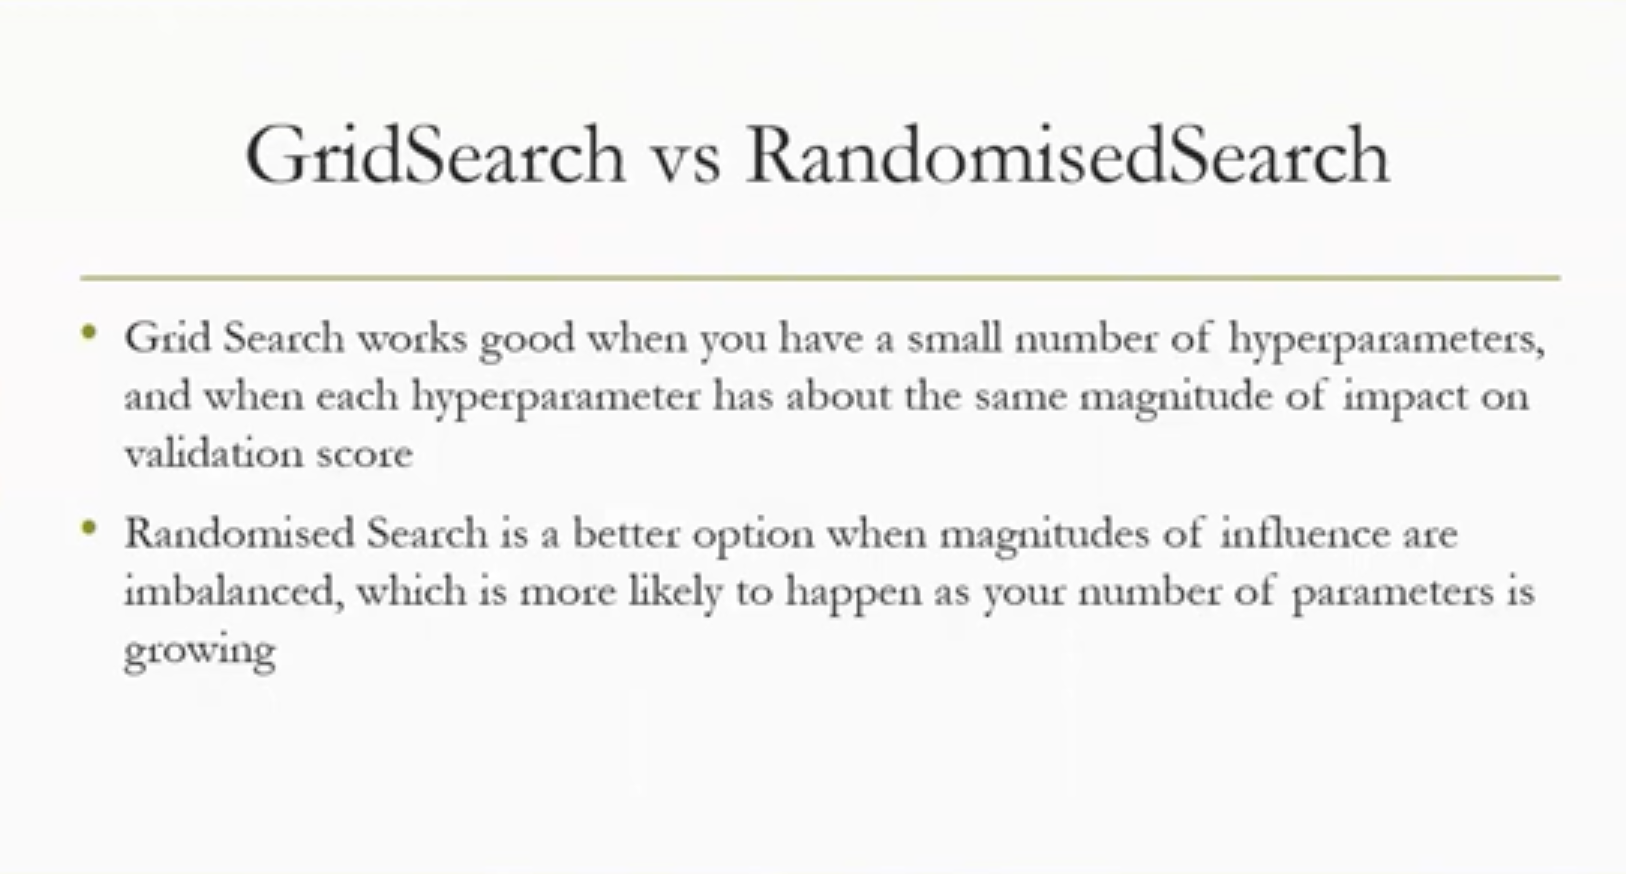

In [15]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [16]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
params={'solver':('liblinear','lbfgs','newton_cg'),
       'C':[0.001,0.01,1,10,100],
       'penalty':('l1','l2','elasticnet'),
       'max_iter':[1,5,10,50,100]}

In [17]:
rscv=RandomizedSearchCV(classifier,params,cv=10)
rscv.fit(xtrain,ytrain)

C:\Users\SRP\Anaconda2\envs\tfsrp3.6\lib\site-packages\sklearn\model_selection\_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\SRP\Anaconda2\envs\tfsrp3.6\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\SRP\Anaconda2\envs\tfsrp3.6\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\SRP\Anaconda2\envs\tfsrp3.6\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
C:\Users\SRP\Anaconda2\envs\tfsrp3.6\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceW

RandomizedSearchCV(cv=10, estimator=LogisticRegression(),
                   param_distributions={'C': [0.001, 0.01, 1, 10, 100],
                                        'max_iter': [1, 5, 10, 50, 100],
                                        'penalty': ('l1', 'l2', 'elasticnet'),
                                        'solver': ('liblinear', 'lbfgs',
                                                   'newton_cg')})

In [14]:
rscv.best_params_

{'C': 10, 'max_iter': 50, 'penalty': 'l1', 'solver': 'liblinear'}

In [18]:
classifier=LogisticRegression(C=10, max_iter=50, penalty='l1', solver='liblinear')
classifier.fit(xtrain,ytrain)
from sklearn.naive_bayes import GaussianNB
classifier2=GaussianNB()
classifier2.fit(xtrain,ytrain)
ypred1=classifier.predict(xtest)
ypred2=classifier2.predict(xtest)

In [19]:
classifier.fit(xtrain,ytrain)

LogisticRegression(C=10, max_iter=50, penalty='l1', solver='liblinear')

In [20]:
ypred2=classifier.predict(xtest)

In [21]:
from sklearn.metrics import classification_report
cr2=classification_report(ytest,ypred2)
cr1=classification_report(ytest,ypred1)
print('Classification report for Logistic Regression:' ,cr1)
print('Classification report for Naive Bayes:' ,cr2)

Classification report for Logistic Regression:               precision    recall  f1-score   support

           0       0.82      0.94      0.88        50
           1       0.84      0.62      0.71        26

    accuracy                           0.83        76
   macro avg       0.83      0.78      0.79        76
weighted avg       0.83      0.83      0.82        76

Classification report for Naive Bayes:               precision    recall  f1-score   support

           0       0.82      0.94      0.88        50
           1       0.84      0.62      0.71        26

    accuracy                           0.83        76
   macro avg       0.83      0.78      0.79        76
weighted avg       0.83      0.83      0.82        76



In [22]:
from sklearn.neighbors import KNeighborsClassifier
classifier3=KNeighborsClassifier(n_neighbors=10,p=2,metric='minkowski')
classifier3.fit(xtrain,ytrain)
ypred3=classifier3.predict(xtest)
cr3=classification_report(ytest,ypred3)
print('classification report in KNN:',cr3)

classification report in KNN:               precision    recall  f1-score   support

           0       0.79      0.92      0.85        50
           1       0.78      0.54      0.64        26

    accuracy                           0.79        76
   macro avg       0.79      0.73      0.74        76
weighted avg       0.79      0.79      0.78        76



In [24]:
## Elbow Method
error_rate = []
# Will take some time
K_value=range(1,80)
for i in K_value:
 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(xtrain,ytrain)
 pred_i = knn.predict(xtest)
 error_rate.append(np.mean(pred_i != ytest))

K: 0.17105263157894737


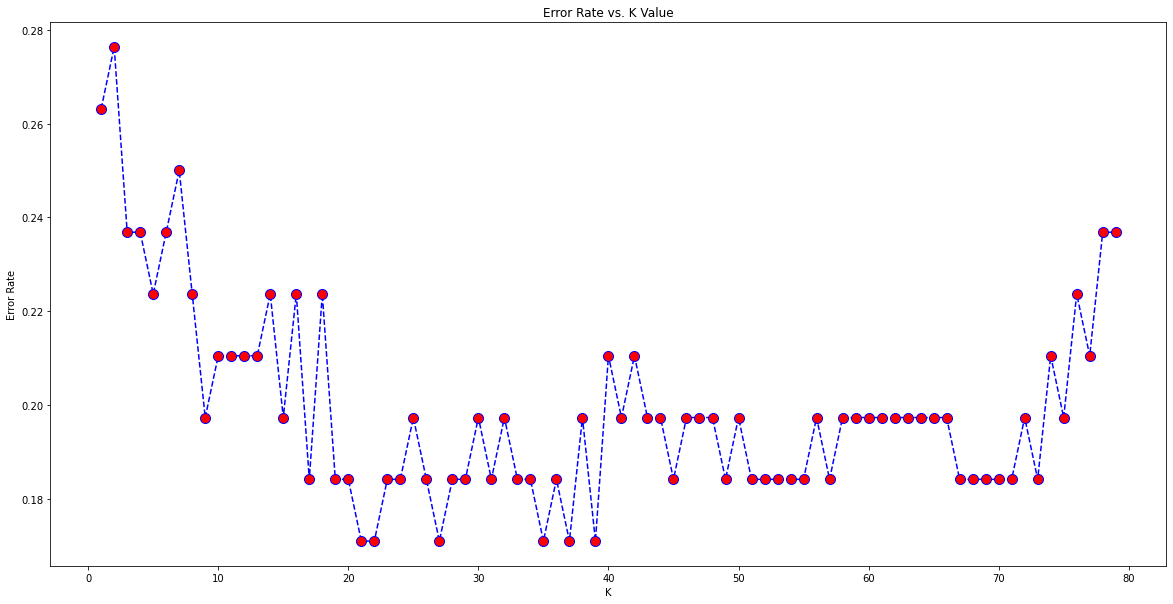

In [25]:
plt.figure(figsize=(20,10))
plt.plot(K_value,error_rate,color='blue', linestyle='dashed', marker='o',
 markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print('K:',min(error_rate))

In [23]:
from sklearn.neighbors import KNeighborsClassifier
classifier3=KNeighborsClassifier(n_neighbors=41,p=2,metric='minkowski')
classifier3.fit(xtrain,ytrain)
ypred3=classifier3.predict(xtest)
cr3=classification_report(ytest,ypred3)
print('classification report in KNN:',cr3)

classification report in KNN:               precision    recall  f1-score   support

           0       0.78      0.98      0.87        50
           1       0.92      0.46      0.62        26

    accuracy                           0.80        76
   macro avg       0.85      0.72      0.74        76
weighted avg       0.83      0.80      0.78        76



In [ ]:
## Support vector machine(Regressor as well as Classifier)
from sklearn.svm import SVC
classifier4=SVC()
param={'kernel':('linear','rbf','poly','sigmoid'),
      'C':(0.001,0.01,1,10,100),
      'coef0':(0.001,0.01,0.05,0.09,0.9),
      'gamma':(0.1,0.2,0.3,0.5,0.6),
      'degree':(2,3,4)}
gridsearch=GridSearchCV(classifier4,param,cv=10,n_jobs=-1)
gridsearch.fit(xtrain,ytrain)

In [ ]:
gridsearch.best_params_

In [24]:
from sklearn.svm import SVC
classifier4=SVC()
classifier4=SVC(kernel='linear',C=1,coef0=0.001,degree=2,gamma=0.1)
classifier4.fit(xtrain,ytrain)
ypred4=classifier4.predict(xtest)

In [25]:
cr4=classification_report(ytest,ypred4)
print(cr4)

              precision    recall  f1-score   support

           0       0.82      0.92      0.87        50
           1       0.80      0.62      0.70        26

    accuracy                           0.82        76
   macro avg       0.81      0.77      0.78        76
weighted avg       0.81      0.82      0.81        76



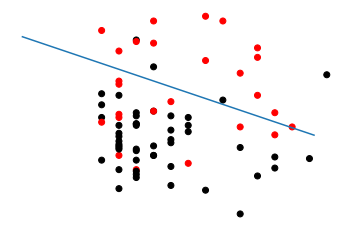

In [26]:
# Visualizing SVM
# Plot data points and color using their class
color = ['black' if c == 0 else 'red' for c in ytest]
plt.scatter(xtest[:,0], xtest[:,1], c=color)

# Create the hyperplane
w = classifier4.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-2.5, 2.5)
yy = a * xx - (classifier4.intercept_[0]) / w[1]

# Plot the hyperplane
plt.plot(xx, yy)
plt.axis("off"), plt.show();

In [ ]:
## Time for decision trees
from sklearn.tree import DecisionTreeClassifier
classifier5=DecisionTreeClassifier()
paramm={"criterion":["gini","entropy"],
       "max_depth": range(1,10),
       "max_features":(1,2,3,4,5,6,7,8),
       "min_samples_leaf":range(1,5),
       "min_samples_split": range(1,10)}
gridd=GridSearchCV(classifier5,paramm,cv=10,n_jobs=-1)
gridd.fit(xtrain,ytrain)


In [ ]:
gridd.best_params_

In [27]:
from sklearn.tree import DecisionTreeClassifier
classifier5=DecisionTreeClassifier()
classifier5=DecisionTreeClassifier(criterion='entropy',max_depth=7,max_features=7,min_samples_leaf=1,min_samples_split=3)
classifier5.fit(xtrain,ytrain)
ypred5=classifier5.predict(xtest)
cr5=classification_report(ytest,ypred5)
print(cr5)

              precision    recall  f1-score   support

           0       0.80      0.88      0.84        50
           1       0.71      0.58      0.64        26

    accuracy                           0.78        76
   macro avg       0.76      0.73      0.74        76
weighted avg       0.77      0.78      0.77        76



# Random Forest
Most important hyperparameters of Random Forest:

1.n_estimators: The n_estimators parameter specifies the number of trees in the forest of the model. The default value for this parameter is 10, which means that 10 different decision trees will be constructed in the random forest.
2. max_depth: The max_depth parameter specifies the maximum depth of each tree. The default value for max_depth is None, which means that each tree will expand until every leaf is pure. A pure leaf is one where all of the data on the leaf comes from the same class.
3. min_samples_split: The min_samples_split parameter specifies the minimum number of samples required to split an internal leaf node. The default value for this parameter is 2, which means that an internal node must have at least two samples before it can be split to have a more specific classification.
4. min_samples_leaf: The min_samples_leaf parameter specifies the minimum number of samples required to be at a leaf node. The default value for this parameter is 1, which means that every leaf must have at least 1 sample that it classifies.

In [29]:
from sklearn.ensemble import RandomForestClassifier
classifier6=RandomForestClassifier()
param_grid={"n_estimators":[10,20,50,100],
           "max_depth":range(1,6),"min_samples_leaf":[1,2,3,4],"min_samples_split":[1,2,3,4],"criterion":["gini","entropy"]}
gridd_search=GridSearchCV(classifier6,param_grid,cv=10,n_jobs=-1)
gridd_search.fit(xtrain,ytrain)

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 6),
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [1, 2, 3, 4],
                         'n_estimators': [10, 20, 50, 100]})

In [30]:
gridd_search.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'min_samples_leaf': 3,
 'min_samples_split': 3,
 'n_estimators': 50}

In [48]:
classifier6=RandomForestClassifier(criterion='entropy',max_depth=4,min_samples_leaf=3,min_samples_split=3,n_estimators=1000,random_state=100)
classifier6.fit(xtrain,ytrain)
ypred6=classifier6.predict(xtest)
cr6=classification_report(ytest,ypred6)
print(cr6)

              precision    recall  f1-score   support

           0       0.81      0.94      0.87        50
           1       0.83      0.58      0.68        26

    accuracy                           0.82        76
   macro avg       0.82      0.76      0.78        76
weighted avg       0.82      0.82      0.81        76



### Hyperparameters for Adaboost
1)base_estimator: It is a weak learner used to train the model. It uses DecisionTreeClassifier as default weak learner for training purpose. You can also specify different machine learning algorithms.
2)n_estimators: Number of weak learners to train iteratively.
3)learning_rate: It contributes to the weights of weak learners. It uses 1 as a default value.

In [121]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier()
paramm_grid={"n_estimators":[10,20,50,100,150,200,250,300,350,400,450,500],
             "learning_rate":[0.001,0.01,0.5,1]}
gridd_search=GridSearchCV(abc,paramm_grid,cv=10,n_jobs=-1)
gridd_search.fit(xtrain,ytrain)



GridSearchCV(cv=10, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.5, 1],
                         'n_estimators': [10, 20, 50, 100, 150, 200, 250, 300,
                                          350, 400, 450, 500]})

In [122]:
gridd_search.best_params_

{'learning_rate': 0.01, 'n_estimators': 300}

In [49]:
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
base_estimator=SVC(probability=True)
abc2=AdaBoostClassifier(n_estimators=300,learning_rate=0.01,base_estimator=base_estimator)
model=abc2.fit(xtrain,ytrain)
y_pred7=model.predict(xtest)
cr7=classification_report(ytest,y_pred7)
print(cr7)

              precision    recall  f1-score   support

           0       0.80      0.96      0.87        50
           1       0.88      0.54      0.67        26

    accuracy                           0.82        76
   macro avg       0.84      0.75      0.77        76
weighted avg       0.83      0.82      0.80        76



In [61]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(random_state=0)
paramm_grid={"max_iter":[10,20,50,100,150,200,250,300,350,400,450,500,600,700,800,900,1000],
             "penalty":['l1','l2'],"loss":["hinge","log"],"alpha":[0.0001,0.001,0.01,0.1,0.5,1]}
gridd_search=GridSearchCV(sgd,paramm_grid,cv=10,n_jobs=-1)
gridd_search.fit(xtrain,ytrain)


C:\Users\SRP\Anaconda2\envs\tensorflow\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:573: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


GridSearchCV(cv=10, estimator=SGDClassifier(random_state=0), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 0.5, 1],
                         'loss': ['hinge', 'log'],
                         'max_iter': [10, 20, 50, 100, 150, 200, 250, 300, 350,
                                      400, 450, 500, 600, 700, 800, 900, 1000],
                         'penalty': ['l1', 'l2']})

In [85]:
gridd_search.best_params_

{'alpha': 0.01, 'loss': 'log', 'max_iter': 10, 'penalty': 'l2'}

In [92]:
sgd=SGDClassifier(alpha=0.01,max_iter=1000,penalty="l2",loss="log")
sgd.fit(xtrain,ytrain)
y_pred8=sgd.predict(xtest)
cr8=classification_report(ytest,y_pred8)
print(cr8)

              precision    recall  f1-score   support

           0       0.82      0.94      0.88        50
           1       0.84      0.62      0.71        26

    accuracy                           0.83        76
   macro avg       0.83      0.78      0.79        76
weighted avg       0.83      0.83      0.82        76



In [94]:
from sklearn.ensemble import GradientBoostingClassifier

In [95]:
gbc = GradientBoostingClassifier()
parameters = {
    "n_estimators":[5,50,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.001,0.01,0.1,0.2,0.5,0.8]
}
gr_s=GridSearchCV(gbc,parameters,cv=10,n_jobs=-1)
gr_s.fit(xtrain,ytrain)

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.5, 0.8],
                         'max_depth': [1, 3, 5, 7, 9],
                         'n_estimators': [5, 50, 250, 500]})

In [112]:
gr_s.best_params_

{'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50}

In [235]:
gbc=GradientBoostingClassifier(learning_rate=0.1,max_depth=3,n_estimators=50,random_state=0)
gbc.fit(xtrain,ytrain)
y_pred9=gbc.predict(xtest)
cr9=classification_report(ytest,y_pred9)
print(cr9)

              precision    recall  f1-score   support

           0       0.83      0.90      0.87        50
           1       0.77      0.65      0.71        26

    accuracy                           0.82        76
   macro avg       0.80      0.78      0.79        76
weighted avg       0.81      0.82      0.81        76



In [140]:
from xgboost import XGBClassifier

C:\Users\SRP\Anaconda2\envs\tensorflow\lib\site-packages\dask\dataframe\utils.py:14: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [178]:
params={
 "learning_rate"    : [0.001,0.001,0.1] ,
 "max_depth"        : [ 3, 4, 5],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ],
    "n_estimators"  : [10,40,50,100,200],
    "subsample"     : [0.2,0.4,0.5,0.9]}

In [179]:
tuning=GridSearchCV(xgb,params,n_jobs=-1,cv=10)
tuning.fit(xtrain,ytrain)
tuning.best_params_

{'colsample_bytree': 0.5,
 'learning_rate': 0.1,
 'max_depth': 3,
 'min_child_weight': 3,
 'n_estimators': 50,
 'subsample': 0.4}

In [241]:
xgb=XGBClassifier(colsample_bytree=0.5,learning_rate=0.01,max_depth=3,min_child_weight=3,n_estimators=200,subsample=0.5)
xgb.fit(xtrain,ytrain)
y_pred10=xgb.predict(xtest)
y_train_predict=xgb.predict(xtrain)
from sklearn.metrics import accuracy_score
print('Training accuracy',accuracy_score(ytrain,y_train_predict))
print('Testing accuracy',accuracy_score(ytest,y_pred10))

Training accuracy 0.7991329479768786
Testing accuracy 0.8289473684210527


In [242]:
cr10=classification_report(ytest,y_pred10)
print(cr10)

              precision    recall  f1-score   support

           0       0.81      0.96      0.88        50
           1       0.88      0.58      0.70        26

    accuracy                           0.83        76
   macro avg       0.85      0.77      0.79        76
weighted avg       0.84      0.83      0.82        76



In [50]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [51]:
ann = tf.keras.models.Sequential()

In [79]:
ann.add(tf.keras.layers.Dense(units=200, activation='relu'))

In [80]:
ann.add(tf.keras.layers.Dense(units=100, activation='relu'))

In [81]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [82]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [58]:
X=d.iloc[:,1:9].values
y=d.iloc[:,9].values

In [86]:
ann.fit(xtrain, ytrain,epochs = 1000)

Train on 692 samples
Epoch 1/1000
692/692 [==============================] - 0s 94us/sample - loss: 0.3406 - accuracy: 0.8367
Epoch 2/1000
692/692 [==============================] - 0s 82us/sample - loss: 0.3214 - accuracy: 0.8309
Epoch 3/1000
692/692 [==============================] - 0s 69us/sample - loss: 0.3141 - accuracy: 0.8439
Epoch 4/1000
692/692 [==============================] - 0s 69us/sample - loss: 0.3213 - accuracy: 0.8396
Epoch 5/1000
692/692 [==============================] - 0s 68us/sample - loss: 0.3373 - accuracy: 0.8280
Epoch 6/1000
692/692 [==============================] - 0s 69us/sample - loss: 0.3204 - accuracy: 0.8396
Epoch 7/1000
692/692 [==============================] - 0s 69us/sample - loss: 0.3211 - accuracy: 0.8425
Epoch 8/1000
692/692 [==============================] - 0s 69us/sample - loss: 0.3487 - accuracy: 0.8309
Epoch 9/1000
692/692 [==============================] - 0s 72us/sample - loss: 0.3358 - accuracy: 0.8194
Epoch 10/1000
692/692 [===========

692/692 [==============================] - 0s 41us/sample - loss: 0.3092 - accuracy: 0.8540
Epoch 79/1000
692/692 [==============================] - 0s 35us/sample - loss: 0.3056 - accuracy: 0.8468
Epoch 80/1000
692/692 [==============================] - 0s 54us/sample - loss: 0.3069 - accuracy: 0.8396
Epoch 81/1000
692/692 [==============================] - 0s 80us/sample - loss: 0.3220 - accuracy: 0.8454
Epoch 82/1000
692/692 [==============================] - 0s 55us/sample - loss: 0.3732 - accuracy: 0.8165
Epoch 83/1000
692/692 [==============================] - 0s 55us/sample - loss: 0.3739 - accuracy: 0.8251
Epoch 84/1000
692/692 [==============================] - 0s 55us/sample - loss: 0.3755 - accuracy: 0.8136
Epoch 85/1000
692/692 [==============================] - 0s 58us/sample - loss: 0.3664 - accuracy: 0.8150
Epoch 86/1000
692/692 [==============================] - 0s 55us/sample - loss: 0.3580 - accuracy: 0.8136
Epoch 87/1000
692/692 [==============================] - 0s 

Epoch 153/1000
692/692 [==============================] - 0s 69us/sample - loss: 0.3413 - accuracy: 0.8280
Epoch 154/1000
692/692 [==============================] - 0s 61us/sample - loss: 0.3314 - accuracy: 0.8425
Epoch 155/1000
692/692 [==============================] - 0s 66us/sample - loss: 0.3224 - accuracy: 0.8324
Epoch 156/1000
692/692 [==============================] - 0s 58us/sample - loss: 0.3267 - accuracy: 0.8280
Epoch 157/1000
692/692 [==============================] - 0s 71us/sample - loss: 0.3211 - accuracy: 0.8324
Epoch 158/1000
692/692 [==============================] - 0s 63us/sample - loss: 0.3115 - accuracy: 0.8338
Epoch 159/1000
692/692 [==============================] - 0s 62us/sample - loss: 0.3086 - accuracy: 0.8367
Epoch 160/1000
692/692 [==============================] - 0s 62us/sample - loss: 0.3195 - accuracy: 0.8324
Epoch 161/1000
692/692 [==============================] - 0s 62us/sample - loss: 0.3145 - accuracy: 0.8468
Epoch 162/1000
692/692 [=============

692/692 [==============================] - 0s 69us/sample - loss: 0.3220 - accuracy: 0.8396
Epoch 230/1000
692/692 [==============================] - 0s 66us/sample - loss: 0.3237 - accuracy: 0.8338
Epoch 231/1000
692/692 [==============================] - 0s 65us/sample - loss: 0.3508 - accuracy: 0.8064
Epoch 232/1000
692/692 [==============================] - 0s 60us/sample - loss: 0.3288 - accuracy: 0.8280
Epoch 233/1000
692/692 [==============================] - 0s 63us/sample - loss: 0.3246 - accuracy: 0.8338
Epoch 234/1000
692/692 [==============================] - 0s 59us/sample - loss: 0.3294 - accuracy: 0.8309
Epoch 235/1000
692/692 [==============================] - 0s 60us/sample - loss: 0.3305 - accuracy: 0.8208
Epoch 236/1000
692/692 [==============================] - 0s 63us/sample - loss: 0.3315 - accuracy: 0.8295
Epoch 237/1000
692/692 [==============================] - 0s 66us/sample - loss: 0.3392 - accuracy: 0.8251
Epoch 238/1000
692/692 [============================

692/692 [==============================] - 0s 58us/sample - loss: 0.3253 - accuracy: 0.8280
Epoch 306/1000
692/692 [==============================] - 0s 60us/sample - loss: 0.3240 - accuracy: 0.8396
Epoch 307/1000
692/692 [==============================] - 0s 55us/sample - loss: 0.3128 - accuracy: 0.8497
Epoch 308/1000
692/692 [==============================] - 0s 45us/sample - loss: 0.3280 - accuracy: 0.8367
Epoch 309/1000
692/692 [==============================] - 0s 72us/sample - loss: 0.3096 - accuracy: 0.8396
Epoch 310/1000
692/692 [==============================] - 0s 67us/sample - loss: 0.3069 - accuracy: 0.8439
Epoch 311/1000
692/692 [==============================] - 0s 61us/sample - loss: 0.3045 - accuracy: 0.8526
Epoch 312/1000
692/692 [==============================] - 0s 62us/sample - loss: 0.3024 - accuracy: 0.8512
Epoch 313/1000
692/692 [==============================] - 0s 105us/sample - loss: 0.3005 - accuracy: 0.8483
Epoch 314/1000
692/692 [===========================

692/692 [==============================] - 0s 57us/sample - loss: 0.3360 - accuracy: 0.7962
Epoch 381/1000
692/692 [==============================] - 0s 62us/sample - loss: 0.3302 - accuracy: 0.8237
Epoch 382/1000
692/692 [==============================] - 0s 56us/sample - loss: 0.3335 - accuracy: 0.8165
Epoch 383/1000
692/692 [==============================] - 0s 49us/sample - loss: 0.3425 - accuracy: 0.8092
Epoch 384/1000
692/692 [==============================] - 0s 73us/sample - loss: 0.3332 - accuracy: 0.8266
Epoch 385/1000
692/692 [==============================] - 0s 58us/sample - loss: 0.3312 - accuracy: 0.8237
Epoch 386/1000
692/692 [==============================] - 0s 62us/sample - loss: 0.3533 - accuracy: 0.8165
Epoch 387/1000
692/692 [==============================] - 0s 58us/sample - loss: 0.3446 - accuracy: 0.8208
Epoch 388/1000
692/692 [==============================] - 0s 56us/sample - loss: 0.3359 - accuracy: 0.8078
Epoch 389/1000
692/692 [============================

692/692 [==============================] - 0s 62us/sample - loss: 0.3112 - accuracy: 0.8410
Epoch 457/1000
692/692 [==============================] - 0s 61us/sample - loss: 0.3026 - accuracy: 0.8497
Epoch 458/1000
692/692 [==============================] - 0s 63us/sample - loss: 0.3028 - accuracy: 0.8483
Epoch 459/1000
692/692 [==============================] - 0s 62us/sample - loss: 0.3054 - accuracy: 0.8425
Epoch 460/1000
692/692 [==============================] - 0s 62us/sample - loss: 0.2981 - accuracy: 0.8526
Epoch 461/1000
692/692 [==============================] - 0s 60us/sample - loss: 0.3067 - accuracy: 0.8353
Epoch 462/1000
692/692 [==============================] - 0s 44us/sample - loss: 0.3089 - accuracy: 0.8324
Epoch 463/1000
692/692 [==============================] - 0s 70us/sample - loss: 0.3043 - accuracy: 0.8497
Epoch 464/1000
692/692 [==============================] - 0s 67us/sample - loss: 0.3220 - accuracy: 0.8497
Epoch 465/1000
692/692 [============================

692/692 [==============================] - 0s 43us/sample - loss: 0.3307 - accuracy: 0.8237
Epoch 533/1000
692/692 [==============================] - 0s 50us/sample - loss: 0.3040 - accuracy: 0.8468
Epoch 534/1000
692/692 [==============================] - 0s 54us/sample - loss: 0.2978 - accuracy: 0.8497
Epoch 535/1000
692/692 [==============================] - 0s 42us/sample - loss: 0.2957 - accuracy: 0.8497
Epoch 536/1000
692/692 [==============================] - 0s 54us/sample - loss: 0.2896 - accuracy: 0.8526
Epoch 537/1000
692/692 [==============================] - 0s 45us/sample - loss: 0.2905 - accuracy: 0.8497
Epoch 538/1000
692/692 [==============================] - 0s 64us/sample - loss: 0.2949 - accuracy: 0.8526
Epoch 539/1000
692/692 [==============================] - 0s 70us/sample - loss: 0.2939 - accuracy: 0.8540
Epoch 540/1000
692/692 [==============================] - 0s 64us/sample - loss: 0.2984 - accuracy: 0.8410
Epoch 541/1000
692/692 [============================

692/692 [==============================] - 0s 58us/sample - loss: 0.2902 - accuracy: 0.8483
Epoch 609/1000
692/692 [==============================] - 0s 57us/sample - loss: 0.2908 - accuracy: 0.8497
Epoch 610/1000
692/692 [==============================] - 0s 57us/sample - loss: 0.2996 - accuracy: 0.8396
Epoch 611/1000
692/692 [==============================] - 0s 57us/sample - loss: 0.3509 - accuracy: 0.8150
Epoch 612/1000
692/692 [==============================] - 0s 57us/sample - loss: 0.3094 - accuracy: 0.8367
Epoch 613/1000
692/692 [==============================] - 0s 56us/sample - loss: 0.3065 - accuracy: 0.8295
Epoch 614/1000
692/692 [==============================] - 0s 58us/sample - loss: 0.3253 - accuracy: 0.8353
Epoch 615/1000
692/692 [==============================] - 0s 55us/sample - loss: 0.3053 - accuracy: 0.8396
Epoch 616/1000
692/692 [==============================] - 0s 59us/sample - loss: 0.3006 - accuracy: 0.8439
Epoch 617/1000
692/692 [============================

692/692 [==============================] - 0s 54us/sample - loss: 0.3156 - accuracy: 0.8382
Epoch 685/1000
692/692 [==============================] - 0s 61us/sample - loss: 0.3088 - accuracy: 0.8382
Epoch 686/1000
692/692 [==============================] - 0s 38us/sample - loss: 0.3086 - accuracy: 0.8396
Epoch 687/1000
692/692 [==============================] - 0s 54us/sample - loss: 0.3074 - accuracy: 0.8382
Epoch 688/1000
692/692 [==============================] - 0s 62us/sample - loss: 0.2992 - accuracy: 0.8454
Epoch 689/1000
692/692 [==============================] - 0s 59us/sample - loss: 0.3061 - accuracy: 0.8367
Epoch 690/1000
692/692 [==============================] - 0s 56us/sample - loss: 0.3084 - accuracy: 0.8410
Epoch 691/1000
692/692 [==============================] - 0s 42us/sample - loss: 0.3131 - accuracy: 0.8324
Epoch 692/1000
692/692 [==============================] - 0s 47us/sample - loss: 0.3321 - accuracy: 0.8353
Epoch 693/1000
692/692 [============================

692/692 [==============================] - 0s 73us/sample - loss: 0.3141 - accuracy: 0.8280
Epoch 761/1000
692/692 [==============================] - 0s 79us/sample - loss: 0.3145 - accuracy: 0.8194
Epoch 762/1000
692/692 [==============================] - 0s 92us/sample - loss: 0.3122 - accuracy: 0.8382
Epoch 763/1000
692/692 [==============================] - 0s 63us/sample - loss: 0.3113 - accuracy: 0.8295
Epoch 764/1000
692/692 [==============================] - 0s 56us/sample - loss: 0.3080 - accuracy: 0.8382
Epoch 765/1000
692/692 [==============================] - 0s 56us/sample - loss: 0.3151 - accuracy: 0.8280
Epoch 766/1000
692/692 [==============================] - 0s 58us/sample - loss: 0.3067 - accuracy: 0.8367
Epoch 767/1000
692/692 [==============================] - 0s 62us/sample - loss: 0.3226 - accuracy: 0.8338
Epoch 768/1000
692/692 [==============================] - 0s 66us/sample - loss: 0.3336 - accuracy: 0.8150
Epoch 769/1000
692/692 [============================

692/692 [==============================] - 0s 61us/sample - loss: 0.3309 - accuracy: 0.8266
Epoch 837/1000
692/692 [==============================] - 0s 58us/sample - loss: 0.3147 - accuracy: 0.8338
Epoch 838/1000
692/692 [==============================] - 0s 56us/sample - loss: 0.3119 - accuracy: 0.8295
Epoch 839/1000
692/692 [==============================] - 0s 59us/sample - loss: 0.3083 - accuracy: 0.8367
Epoch 840/1000
692/692 [==============================] - 0s 57us/sample - loss: 0.3028 - accuracy: 0.8483
Epoch 841/1000
692/692 [==============================] - 0s 62us/sample - loss: 0.3071 - accuracy: 0.8367
Epoch 842/1000
692/692 [==============================] - 0s 67us/sample - loss: 0.3085 - accuracy: 0.8439
Epoch 843/1000
692/692 [==============================] - 0s 71us/sample - loss: 0.3137 - accuracy: 0.8309
Epoch 844/1000
692/692 [==============================] - 0s 71us/sample - loss: 0.3018 - accuracy: 0.8367
Epoch 845/1000
692/692 [============================

692/692 [==============================] - 0s 59us/sample - loss: 0.3603 - accuracy: 0.8136
Epoch 913/1000
692/692 [==============================] - 0s 56us/sample - loss: 0.3467 - accuracy: 0.8309
Epoch 914/1000
692/692 [==============================] - 0s 56us/sample - loss: 0.3430 - accuracy: 0.8223
Epoch 915/1000
692/692 [==============================] - 0s 56us/sample - loss: 0.3337 - accuracy: 0.8295
Epoch 916/1000
692/692 [==============================] - 0s 57us/sample - loss: 0.3345 - accuracy: 0.8295
Epoch 917/1000
692/692 [==============================] - 0s 58us/sample - loss: 0.3215 - accuracy: 0.8353
Epoch 918/1000
692/692 [==============================] - 0s 56us/sample - loss: 0.3180 - accuracy: 0.8410
Epoch 919/1000
692/692 [==============================] - 0s 56us/sample - loss: 0.3194 - accuracy: 0.8353
Epoch 920/1000
692/692 [==============================] - 0s 57us/sample - loss: 0.3142 - accuracy: 0.8382
Epoch 921/1000
692/692 [============================

692/692 [==============================] - 0s 79us/sample - loss: 0.3132 - accuracy: 0.8497
Epoch 989/1000
692/692 [==============================] - 0s 116us/sample - loss: 0.3094 - accuracy: 0.8555
Epoch 990/1000
692/692 [==============================] - 0s 68us/sample - loss: 0.3381 - accuracy: 0.8324
Epoch 991/1000
692/692 [==============================] - 0s 100us/sample - loss: 0.3164 - accuracy: 0.8454
Epoch 992/1000
692/692 [==============================] - 0s 112us/sample - loss: 0.3112 - accuracy: 0.8512
Epoch 993/1000
692/692 [==============================] - 0s 75us/sample - loss: 0.3271 - accuracy: 0.8367
Epoch 994/1000
692/692 [==============================] - 0s 62us/sample - loss: 0.3196 - accuracy: 0.8367
Epoch 995/1000
692/692 [==============================] - 0s 59us/sample - loss: 0.3071 - accuracy: 0.8497
Epoch 996/1000
692/692 [==============================] - 0s 59us/sample - loss: 0.3057 - accuracy: 0.8526
Epoch 997/1000
692/692 [=========================

In [84]:
yp=ann.predict(xtest)
yp

array([[0.13702878],
       [0.01588635],
       [0.01626956],
       [0.04991161],
       [0.8992152 ],
       [0.07743634],
       [0.07769204],
       [0.07301352],
       [0.69555193],
       [0.07384797],
       [0.8680807 ],
       [0.25750527],
       [0.01588635],
       [0.01588469],
       [0.07942031],
       [0.01589703],
       [0.9648856 ],
       [0.54977876],
       [0.03518687],
       [0.5679194 ],
       [0.8392305 ],
       [0.01586646],
       [0.07759528],
       [0.81400925],
       [0.9652443 ],
       [0.07878566],
       [0.06591023],
       [0.01589364],
       [0.01593064],
       [0.04134509],
       [0.8935696 ],
       [0.04005821],
       [0.81056446],
       [0.5338778 ],
       [0.05724443],
       [0.4935219 ],
       [0.02784636],
       [0.07796131],
       [0.47279462],
       [0.5260564 ],
       [0.8996687 ],
       [0.01586762],
       [0.01586667],
       [0.01601335],
       [0.45924306],
       [0.04046747],
       [0.2132483 ],
       [0.183